In [1]:
# ! pip install psycopg2

In [3]:
import pandas as pd
import numpy as np

In [4]:
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [6]:
conn = psycopg2.connect(
    host="technical-test-1.cgajoruzs0oh.ap-southeast-2.rds.amazonaws.com",
    user="candidate",
    password="NW337AkNQH76veGc",
    port=5432,
    database="technical_test")

In [7]:
cursor = conn.cursor()

In [5]:
cursor.execute("SELECT * from trades")

In [6]:
trades = cursor.fetchall()

In [7]:
trades = pd.DataFrame(trades)

In [8]:
trades.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0
3,E62BE617269467931F2239C2771605C2,363723A73A926A7434E815F2F1D5ED61,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,10,2020-08-28 02:46:57,1926.68000,2020-08-28 02:51:13,100.0
4,54D2B4C5ECAE5FBC316524329846F81E,9CD4110328DA4CD71FFE0BE486D51094,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,85,2020-08-11 09:27:28,1999.12000,2020-08-11 09:27:54,100.0


In [9]:
trades.columns

RangeIndex(start=0, stop=11, step=1)

In [8]:
cursor.execute("SELECT * from users")

In [9]:
users = cursor.fetchall()

In [10]:
users = pd.DataFrame(users)

In [12]:
users.head()

,0,1,2,3,4
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
3,DEFB729116227EF8582BFEC65F998489,76791A893BDB9A68E8EE44898D581A60,103357E3E40A9C0E4E9D36110F7BBC7A,USD,1
4,9EAD9A73AA6C93823C56BB8C2E798B45,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1


# EDA

In [13]:
trades.shape, users.shape

((100000, 11), (1000, 5))

In [14]:
trades.nunique()

0       5142
1     100000
2          3
3         71
4          6
5          2
6        343
7      86314
8      35950
9      81056
10         5
dtype: int64

In [15]:
users.nunique()

0    666
1      3
2     19
3      4
4      2
dtype: int64

In [25]:
trades[2].value_counts()

2F1CA40D76D7E6165DBA3924CE0D3B5C    81064
3D1F7E00251C43107EF39F55300781DB    18365
54203B42716FE7C40138AE6C4913EBBC      571
Name: 2, dtype: int64

In [26]:
users[1].value_counts()

76791A893BDB9A68E8EE44898D581A60    823
3D1F7E00251C43107EF39F55300781DB    174
54203B42716FE7C40138AE6C4913EBBC      3
Name: 1, dtype: int64

#### Checking for common columns in both tables

In [11]:
trades_0 = pd.DataFrame(trades[0].unique())
trades_1 = pd.DataFrame(trades[1].unique())
trades_2 = pd.DataFrame(trades[2].unique())

users_0 = pd.DataFrame(users[0].unique())
users_1 = pd.DataFrame(users[1].unique())
users_2 = pd.DataFrame(users[2].unique())

In [17]:
trades_0.shape,trades_1.shape,trades_2.shape,users_0.shape,users_1.shape,users_2.shape

((5142, 1), (100000, 1), (3, 1), (666, 1), (3, 1), (19, 1))

In [12]:
# trades_0.join(users_0).count()
print(pd.merge(trades_0, users_0, on=0).count())
print(pd.merge(trades_0, users_1, on=0).count())
print(pd.merge(trades_0, users_2, on=0).count())
print(pd.merge(trades_1, users_0, on=0).count())
print(pd.merge(trades_1, users_1, on=0).count())
print(pd.merge(trades_1, users_2, on=0).count())
print(pd.merge(trades_2, users_0, on=0).count())
print(pd.merge(trades_2, users_1, on=0).count())
print(pd.merge(trades_2, users_2, on=0).count())

0    116
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    2
dtype: int64
0    0
dtype: int64


In [16]:
trades.columns =['login_hash', 'ticket_hash', 'server_hash', 'symbol','digits','cmd','volume','open_time','open_price',
                'close_time','contractsize']
users.columns = ['login_hash','server_hash','country_hash','currency','enable']

In [23]:
trades.head()

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0
3,E62BE617269467931F2239C2771605C2,363723A73A926A7434E815F2F1D5ED61,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,10,2020-08-28 02:46:57,1926.68000,2020-08-28 02:51:13,100.0
4,54D2B4C5ECAE5FBC316524329846F81E,9CD4110328DA4CD71FFE0BE486D51094,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,85,2020-08-11 09:27:28,1999.12000,2020-08-11 09:27:54,100.0


In [24]:
users.head()

,login_hash,server_hash,country_hash,currency,enable
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
3,DEFB729116227EF8582BFEC65F998489,76791A893BDB9A68E8EE44898D581A60,103357E3E40A9C0E4E9D36110F7BBC7A,USD,1
4,9EAD9A73AA6C93823C56BB8C2E798B45,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1


## Trades

In [26]:
trades_dup = trades.drop_duplicates()

In [27]:
trades.shape, trades_dup.shape

((100000, 11), (100000, 11))

In [28]:
trades.isnull().sum()

login_hash      0
ticket_hash     0
server_hash     0
symbol          0
digits          0
cmd             0
volume          0
open_time       0
open_price      0
close_time      0
contractsize    7
dtype: int64

In [313]:
trades[trades['contractsize'].isnull()].head(10)

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,trade_time,contract_volume,price_total
869,2BCA9F6675B4F907E51DE5570E443D2B,B883EA07D74C0EB619A7ECC92F59312C,2F1CA40D76D7E6165DBA3924CE0D3B5C,COFFEE,2,1,100,2020-08-19 15:46:03,121.37,2020-08-19 16:26:32,NaN,0 days 00:40:29,NaN,NaN
6752,32DE9EECD10691C33D28F716CC255364,7EB45147326758A1128032D6D67E2235,3D1F7E00251C43107EF39F55300781DB,COFFEE,2,0,100,2020-08-11 16:33:22,112.89,2020-08-12 16:51:29,NaN,1 days 00:18:07,NaN,NaN
7818,2BCA9F6675B4F907E51DE5570E443D2B,3A4199B38A115C61789D3611B1490381,2F1CA40D76D7E6165DBA3924CE0D3B5C,COFFEE,2,0,100,2020-08-14 17:04:35,118.54,2020-08-14 19:51:32,NaN,0 days 02:46:57,NaN,NaN
8371,87664AA1F50A83BB2429989AA470A167,DDBAA964028BEBBDFF5EC91F9C268829,3D1F7E00251C43107EF39F55300781DB,COFFEE,2,0,100,2020-08-03 13:43:47,118.95,2020-08-05 16:18:59,NaN,2 days 02:35:12,NaN,NaN
76794,2BCA9F6675B4F907E51DE5570E443D2B,87E404EF518982E7B276442506AFF3B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,COFFEE,2,1,100,2020-08-19 13:59:06,121.68,2020-08-19 15:13:10,NaN,0 days 01:14:04,NaN,NaN
92109,D33487486545A737682F7D1E5ECEABD8,EFC383645A70715146570CF4B4AF2607,2F1CA40D76D7E6165DBA3924CE0D3B5C,COFFEE,2,1,100,2020-08-31 18:32:06,127.67,2020-08-31 19:26:24,NaN,0 days 00:54:18,NaN,NaN
97721,2BCA9F6675B4F907E51DE5570E443D2B,EE9AA9FD12760CDD3F86FE72F84CFD0A,2F1CA40D76D7E6165DBA3924CE0D3B5C,COFFEE,2,1,100,2020-08-17 12:10:50,115.55,2020-08-17 14:54:03,NaN,0 days 02:43:13,NaN,NaN


In [317]:
trades[trades['symbol']=='COFFEE']['symbol'].count(), trades[trades['contractsize'].isnull()]['ticket_hash'].count()

(7, 7)

### Issue 1
Financial instrument 'COFFEE' does not have contractsize / contractsize with 0 corresponds to financial instrument 'COFFEE'

In [22]:
trades['volume'].describe()

count    100000.000000
mean         17.986650
std         100.438786
min           0.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       10000.000000
Name: volume, dtype: float64

In [23]:
trades[trades['volume']==0].head()

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
8349,9D6DFBCA3FD40AFF3097964853627A1E,BEA18D06F216DC9352B32B6CEDE0C373,54203B42716FE7C40138AE6C4913EBBC,EURUSD,5,0,0,2020-08-07 01:05:46,1.18804,2020-08-07 23:27:37,100000.0


### Issue 2 
Trade ID 'BEA18D06F216DC9352B32B6CEDE0C373' has trade size = 0.

In [41]:
trades['open_time'].min(),trades['open_time'].max(),trades['close_time'].min(),trades['close_time'].max()

(Timestamp('2020-08-03 00:01:05'),
 Timestamp('2020-08-31 23:58:39'),
 Timestamp('2020-08-03 00:36:19'),
 Timestamp('2022-08-18 23:57:18'))

In [44]:
from pandas import Timestamp
import datetime
trades[trades['close_time'] > Timestamp(datetime.datetime.now())]['close_time'].count()

4780

#### Obs 1:
Nearly 4780 trades have close time in the future

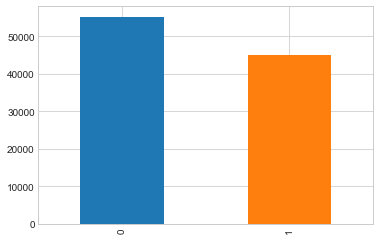

In [557]:
trades['cmd'].value_counts().plot(kind='bar')

In [66]:
trades['trade_time'] = trades['close_time'] - trades['open_time']

In [67]:
trades.head()

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,trade_time
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0,0 days 00:28:58
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0,0 days 02:54:43
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0,13 days 22:33:09
3,E62BE617269467931F2239C2771605C2,363723A73A926A7434E815F2F1D5ED61,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,10,2020-08-28 02:46:57,1926.68000,2020-08-28 02:51:13,100.0,0 days 00:04:16
4,54D2B4C5ECAE5FBC316524329846F81E,9CD4110328DA4CD71FFE0BE486D51094,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,85,2020-08-11 09:27:28,1999.12000,2020-08-11 09:27:54,100.0,0 days 00:00:26


In [68]:
trades['trade_time'].min(), trades['trade_time'].max()

(Timedelta('0 days 00:00:00'), Timedelta('745 days 10:07:01'))

In [95]:
trades['trade_time'].describe()

count                      100000
mean      35 days 13:05:26.651950
std      155 days 20:39:49.378303
min               0 days 00:00:00
25%               0 days 00:08:04
50%               0 days 00:39:50
75%        0 days 04:00:01.750000
max             745 days 10:07:01
Name: trade_time, dtype: object

In [70]:
from pandas import Timedelta
trades[trades['trade_time'] == Timedelta('0 days 00:00:00')]['trade_time'].count()

36

### Issue 3 
36 trades have same open time and close time. 

In [73]:
trades['contract_volume'] = trades['volume']*trades['contractsize']

In [75]:
trades['contract_volume'].describe()

count    9.999300e+04
mean     7.600035e+05
std      6.104741e+06
min      0.000000e+00
25%      2.000000e+02
50%      3.200000e+03
75%      2.000000e+05
max      6.812000e+08
Name: contract_volume, dtype: float64

In [79]:
trades['price_total'] = trades['open_price']*trades['contract_volume']

In [80]:
trades['price_total'].describe()

count    9.999300e+04
mean     1.187653e+07
std      1.420332e+08
min      0.000000e+00
25%      1.969480e+05
50%      4.738600e+05
75%      1.982450e+06
max      2.101650e+10
Name: price_total, dtype: float64

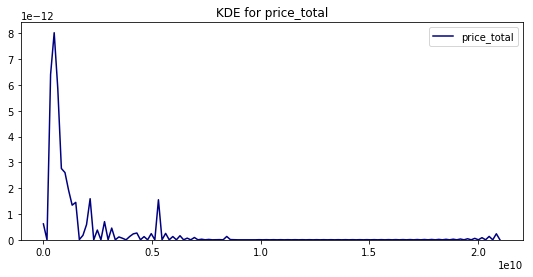

In [107]:
plt.figure(figsize=(9,4))
plt.title("KDE for price_total")
ax0 = sns.kdeplot(trades['price_total'].dropna(), color='navy')

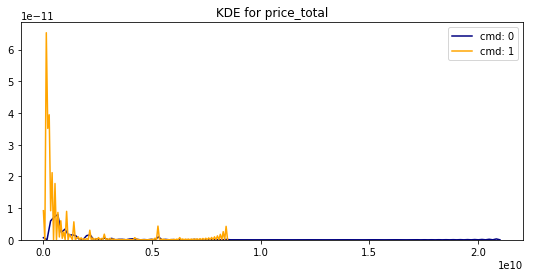

In [108]:
plt.figure(figsize=(9,4))
plt.title("KDE for price_total")
ax0 = sns.kdeplot(trades[trades['cmd']==0]['price_total'].dropna(), color='navy', label='cmd: 0')
ax1 = sns.kdeplot(trades[trades['cmd']==1]['price_total'].dropna(), color='orange', label='cmd: 1')

#### Obs 2:
Trade value/price_total is much concentrated between intervals for cmd = Buy when compared to that of cmd = Sell 

In [51]:
trades['server_hash'].value_counts().to_frame().style.bar()

,server_hash
2F1CA40D76D7E6165DBA3924CE0D3B5C,81064
3D1F7E00251C43107EF39F55300781DB,18365
54203B42716FE7C40138AE6C4913EBBC,571


In [83]:
trades.groupby('server_hash')['price_total'].mean()

server_hash
2F1CA40D76D7E6165DBA3924CE0D3B5C    1.063735e+07
3D1F7E00251C43107EF39F55300781DB    1.672721e+07
54203B42716FE7C40138AE6C4913EBBC    3.179461e+07
Name: price_total, dtype: float64

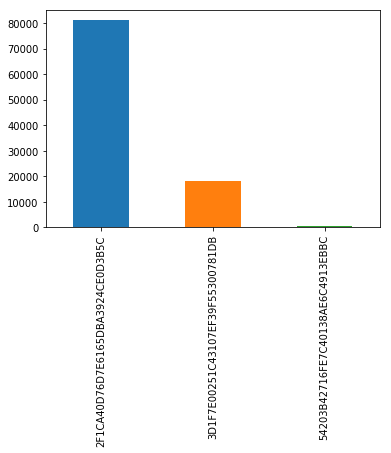

In [50]:
trades['server_hash'].value_counts().plot(kind='bar')

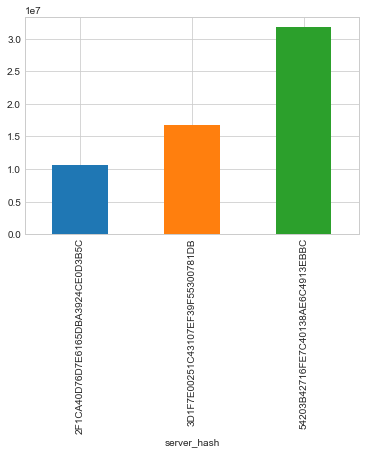

In [558]:
trades.groupby('server_hash')['price_total'].mean().plot(kind='bar')

#### Obs 3:
Number of trades of server and average trade value/price_total of server are inversely proportial.
Here server 54203B42716FE7C40138AE6C4913EBBC has very few number of trades but high value of trades compared to other servers

In [323]:
trades[trades['cmd']==0]['price_total'].sum(), trades[trades['cmd']==1]['price_total'].sum()

(648877026526.9999, 538692505755.8)

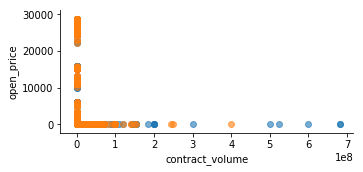

In [118]:
g = sns.PairGrid(trades, y_vars = ['open_price'], x_vars = ['contract_volume'], hue = 'cmd', aspect=2)
ax = g.map(plt.scatter, alpha=0.6)

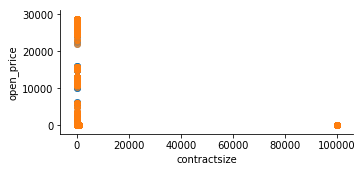

In [119]:
g = sns.PairGrid(trades, y_vars = ['open_price'], x_vars = ['contractsize'], hue = 'cmd', aspect=2)
ax = g.map(plt.scatter, alpha=0.6)

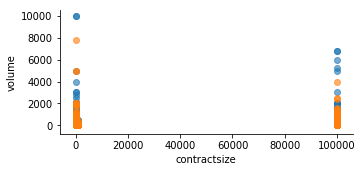

In [123]:
g = sns.PairGrid(trades, y_vars = ['volume'], x_vars = ['contractsize'], hue = 'cmd', aspect=2)
ax = g.map(plt.scatter, alpha=0.6)

In [124]:
trades['contractsize'].describe()

count     99993.000000
mean      44856.840239
std       49669.111281
min           1.000000
25%         100.000000
50%         100.000000
75%      100000.000000
max      100000.000000
Name: contractsize, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


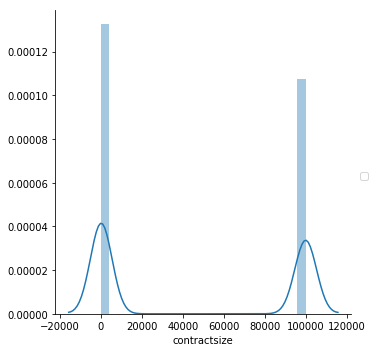

In [383]:
sns.FacetGrid(trades,size=5).map(sns.distplot, "contractsize").add_legend();
plt.show()

In [127]:
trades[(trades['contractsize'] > 100) & (trades['contractsize'] < 100000)]['contractsize'].count()

1328

In [563]:
trades[(trades['contractsize']==100000) | (trades['contractsize']==100)]['ticket_hash'].count()

97193

### Issue 4 
Only 1328 tardes lie in contractsize between 100 and 100000

#### Obs 4:
97% of trades have contractsize of 100 or 100000

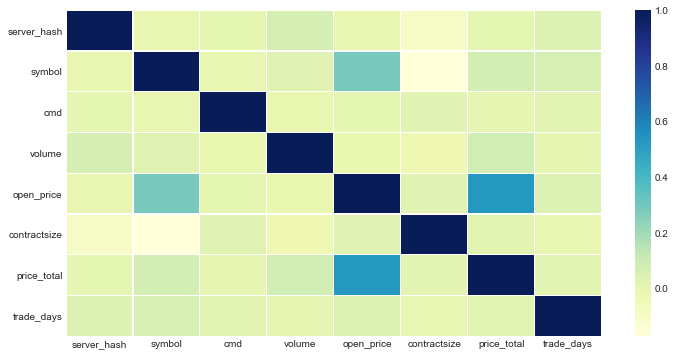

In [438]:
# checkng correlation of among features
plt.figure(figsize=(12,6))
corr = trades[['server_hash','symbol','cmd','volume','open_price','contractsize','price_total', 'trade_days']].apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.2, cmap='YlGnBu')

In [379]:
trades['open_time_hour'] = trades['open_time'].dt.hour
trades['close_time_hour'] = trades['close_time'].dt.hour

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


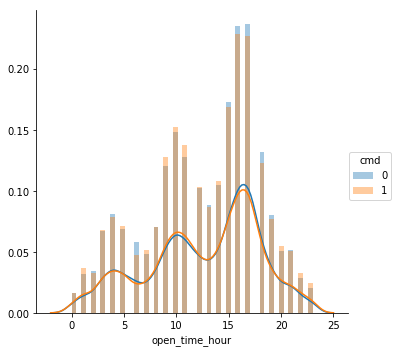

In [380]:
sns.FacetGrid(trades, hue='cmd', size=5).map(sns.distplot, "open_time_hour").add_legend();
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


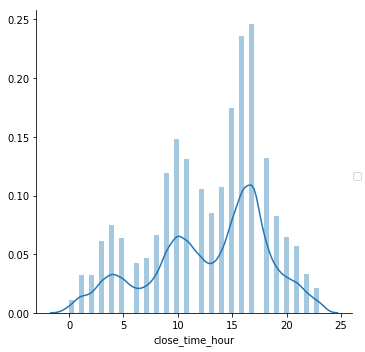

In [381]:
sns.FacetGrid(trades, size=5).map(sns.distplot, "close_time_hour").add_legend();
plt.show()

#### Obs 5:
Trade activity at both open and close are high at 16th, 17th hour of day and very low at early and late hours of day

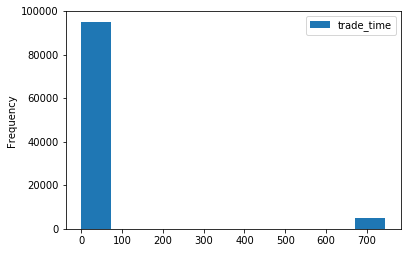

In [421]:
fig, ax = plt.subplots()
pd.DataFrame(trades['trade_time'].dt.days).plot.hist(ax=ax)
plt.show()


In [429]:
trades['trade_days'] = trades['trade_time'].dt.days

In [420]:
sum(trades['trade_time'].dt.days > 0)

11079

#### Obs 6:
around 90% of trades are completed in same day (intra day)

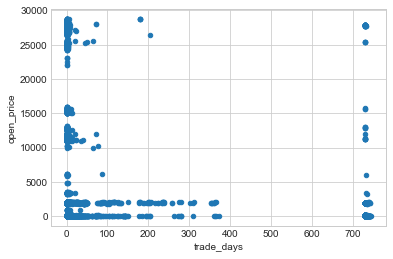

In [440]:
trades.plot(kind='scatter', x='trade_days', y='open_price');
plt.show()
# sns.set_style("whitegrid")
# sns.FacetGrid(trades, hue='cmd', size=4).map(plt.scatter, 'trade_days','open_price').add_legend();
# plt.show()

In [469]:
# checking at Financial Instrument level. creating a table with index as symbol

symbol_count = trades.groupby('symbol')['ticket_hash'].count()
symbol_count = pd.DataFrame(symbol_count).reset_index()
symbol_count.columns = ['symbol','count']

symbol_price = trades.groupby('symbol')['price_total'].sum()
symbol_price = pd.DataFrame(symbol_price).reset_index()
symbol_price.columns = ['symbol','price_sum']

symbol_size = trades.groupby('symbol')['contractsize'].mean()
symbol_size = pd.DataFrame(symbol_size).reset_index()
symbol_size.columns = ['symbol','size']

symbol_days = trades.groupby('symbol')['trade_days'].mean()
symbol_days = pd.DataFrame(symbol_days).reset_index()
symbol_days.columns = ['symbol','days']

In [470]:
trades_symbol = symbol_count.merge(symbol_price, on='symbol').merge(symbol_size, on='symbol').merge(symbol_days, on='symbol')
trades_symbol.head()

,symbol,count,price_sum,size,days
0,AUDCAD,665,5.495059e+08,100000.0,46.445113
1,AUDCHF,115,1.226265e+08,100000.0,38.495652
2,AUDCNH,4,1.843785e+07,100000.0,183.750000
3,AUDJPY,238,2.021810e+10,100000.0,18.689076
4,AUDNZD,1269,1.676735e+09,100000.0,28.642238


In [473]:
trades_symbol.sort_values(by='count', ascending=False).head(5)

,symbol,count,price_sum,size,days
67,XAUUSD,49165,1.458982e+11,100.0,37.104404
26,EURUSD,17609,3.538839e+10,100000.0,31.701630
35,GBPUSD,6723,1.736670e+10,100000.0,37.406961
70,XTIUSD,2352,4.415219e+08,100.0,34.426020
18,EURCHF,1989,8.484966e+09,100000.0,11.553544


In [472]:
trades_symbol.sort_values(by='count', ascending=False)['count'].head(10).sum()

86337

#### Obs 7:
1. Financial Instrument 'XAUUSD' contributes nearly 50% of total trades.
2. 86% of total trades are contributed by top 10 financial instruments

In [478]:
trades_symbol.sort_values(by='price_sum', ascending=False).head(10)

,symbol,count,price_sum,size,days
57,USDJPY,1907,3.921608e+11,100000.0,39.142632
31,GBPJPY,1869,3.768816e+11,100000.0,37.678438
67,XAUUSD,49165,1.458982e+11,100.0,37.104404
13,CHFJPY,859,6.626092e+10,100000.0,21.514552
22,EURJPY,717,6.263100e+10,100000.0,49.447699
26,EURUSD,17609,3.538839e+10,100000.0,31.701630
11,CADJPY,156,2.586109e+10,100000.0,57.615385
3,AUDJPY,238,2.021810e+10,100000.0,18.689076
35,GBPUSD,6723,1.736670e+10,100000.0,37.406961
43,NZDJPY,205,1.136162e+10,100000.0,43.248780


In [477]:
trades_symbol.sort_values(by='price_sum', ascending=False).head(10)['price_sum'].sum()/trades_symbol['price_sum'].sum()

0.9717565669722715

In [480]:
trades_symbol.sort_values(by='price_sum', ascending=False).head(3)['price_sum'].sum()/trades_symbol['price_sum'].sum()

0.770431246519317

#### Obs 8:
97% of total trade value is contributed by top 10 financial instruments

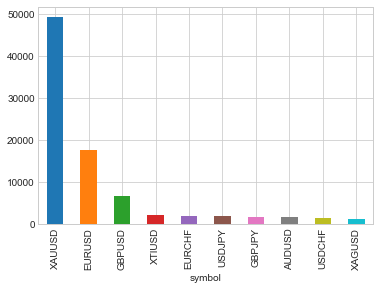

In [491]:
# Top 10 Financial instruments distribution by counts
trades_symbol.sort_values(by='count',ascending=False)['count'].head(10).plot(kind='bar')

In [565]:
# trades_symbol = trades_symbol.reset_index()

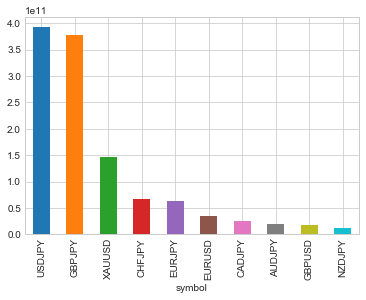

In [502]:
# Top 10 Financial instruments distribution by total trade value
trades_symbol.set_index("symbol").sort_values(by='price_sum',ascending=False)['price_sum'].head(10).plot(kind='bar')

In [504]:
trades.sort_values(by='price_total',ascending=False).head()

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize,trade_time,contract_volume,price_total,open_time_hour,close_time_hour,trade_days
83975,EED392EE7932C0E78688C26A4E62DD04,4A8E447413D150B253BCBA3811C7E784,2F1CA40D76D7E6165DBA3924CE0D3B5C,GBPJPY,3,0,1500,2020-08-13 16:26:36,140.110,2020-08-13 17:43:14,100000.0,0 days 01:16:38,150000000.0,2.101650e+10,16,17,0
17736,822B8D9BC5ED23361C4AEA49B0DDDB0D,08B016DD946ED89126BDA369AA4B27A8,2F1CA40D76D7E6165DBA3924CE0D3B5C,USDJPY,3,1,800,2020-08-10 16:02:15,105.963,2020-08-10 16:06:24,100000.0,0 days 00:04:09,80000000.0,8.477040e+09,16,16,0
31557,D9C1C0B175CB2AEF962A847E4A29940C,D6F63D32F957D9D07884136FC9621FFB,3D1F7E00251C43107EF39F55300781DB,GBPJPY,3,0,606,2020-08-26 02:23:02,139.859,2020-08-28 07:08:17,100000.0,2 days 04:45:15,60600000.0,8.475455e+09,2,7,2
60860,54CCAC70F80DA5577AE3B52BA2844328,627AD335BAE20A8F9553D7123E1D57A9,3D1F7E00251C43107EF39F55300781DB,GBPJPY,3,0,500,2020-08-26 17:22:14,140.182,2020-08-27 19:35:59,100000.0,1 days 02:13:45,50000000.0,7.009100e+09,17,19,1
15646,EC4ED4209BB995DBF0819D738377D964,70CFC5E11554691B958D704E2AC90F74,3D1F7E00251C43107EF39F55300781DB,GBPJPY,3,1,452,2020-08-20 15:57:47,138.812,2020-08-21 07:43:40,100000.0,0 days 15:45:53,45200000.0,6.274302e+09,15,7,0


#### Userid level

In [505]:
userid_count = trades.groupby('login_hash')['ticket_hash'].count()
userid_count = pd.DataFrame(userid_count).reset_index()
userid_count.columns = ['login_hash','count']

userid_price = trades.groupby('login_hash')['price_total'].sum()
userid_price = pd.DataFrame(userid_price).reset_index()
userid_price.columns = ['login_hash','price_sum']

userid_days = trades.groupby('login_hash')['trade_days'].mean()
userid_days = pd.DataFrame(userid_days).reset_index()
userid_days.columns = ['login_hash','days']

In [507]:
trades_userid = userid_count.merge(userid_price, on='login_hash').merge(userid_days, on='login_hash')
trades_userid.head()

,login_hash,count,price_sum,days
0,000BD6BD2A7D5C493B160B0797D04084,16,75575382.0,0.000000
1,0017A6EB11E5D45F8CF08856FBCBD51A,4,11073018.0,260.250000
2,0033D6A63E8CD5F792D7FE32842D7723,18,561929413.0,0.277778
3,004FF7AC9631AF628BD9C496F3C6214F,54,57821881.0,27.111111
4,00590B590F3C408B69314C1D40483475,21,30903861.0,69.809524


In [508]:
trades_userid.sort_values(by='count', ascending=False).head()

,login_hash,count,price_sum,days
524,18D4C2E739573770F9DF198F0E51C1B9,1223,8.887250e+08,11.946852
3996,C686A5D43B23891AE5790E72471B8FBA,1215,5.042692e+09,36.651852
4193,D217892DFCA7F7B273CDDF8E5CEA7048,764,4.810464e+09,17.198953
2835,8E5C603A37FE4B44BEB4329635F8BD96,607,2.540206e+10,29.036244
3886,C20DA42EABAC371D972E78CEB25534F7,576,1.512953e+09,30.621528


In [509]:
trades_userid.sort_values(by='price_sum', ascending=False).head()

,login_hash,count,price_sum,days
57,02D69618D9DBFF1BBFFA4EDCA73B2309,108,8.003570e+10,40.564815
4774,EED392EE7932C0E78688C26A4E62DD04,21,4.478466e+10,0.047619
2835,8E5C603A37FE4B44BEB4329635F8BD96,607,2.540206e+10,29.036244
3992,C67033718DBDE3B01665C2E4C18129CE,17,1.910773e+10,48.235294
1713,54CCAC70F80DA5577AE3B52BA2844328,4,1.812632e+10,183.000000


In [512]:
trades_userid.sort_values(by='price_sum', ascending=False).head(10)['price_sum'].sum()/trades_userid['price_sum'].sum()

0.21496720935175295

## Users

In [59]:
users.isnull().sum()

login_hash      0
server_hash     0
country_hash    0
currency        0
enable          0
dtype: int64

In [18]:
users_dp = users.drop_duplicates()

In [19]:
users_dp.shape

(666, 5)

### Issue 5 
334 duplicates present in the users table

In [139]:
users_dp['country_hash'].value_counts().to_frame().style.bar()

,country_hash
AE54A5C026F31ADA088992587D92CB3A,471
4442E4AF0916F53A07FB8CA9A49B98ED,86
551FE18EF47D4E6E9D943B9A68ADA21D,31
FDEF6DAA799E80DBCE1B561577B21181,12
C51ED580EA5E20C910D951F692512B4D,11
77DAB2F81A6C8C9136EFBA7AB2C4C0F2,10
4A2581E346483DA488A11C4B2D2DE97E,10
3F0E49C46CBDE0C7ADF5EA04A97AB261,8
89F9C9F489BE2A83CF57E53B9197D288,7
D1937220A4F6A24A5A9BAF2978211F98,5


In [140]:
users_dp['currency'].value_counts().to_frame().style.bar()

,currency
USD,596
AUD,67
NZD,2
EUR,1


In [141]:
users_dp['enable'].value_counts().to_frame().style.bar()

,enable
1,644
0,22


#### Obs 10:
90% of accounts currency is USD and almost all accounts are login enabled

# K Means

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
users_kms = users_dp.drop(['login_hash'],axis=1)

In [211]:
users_kms.shape

(666, 4)

In [267]:
users_kms.dtypes

server_hash     object
country_hash    object
currency        object
enable           int64
dtype: object

In [21]:
users_dm = pd.get_dummies(users_kms[['server_hash','country_hash','currency']],drop_first=True)

In [214]:
users_dm.head()

,server_hash_54203B42716FE7C40138AE6C4913EBBC,server_hash_76791A893BDB9A68E8EE44898D581A60,country_hash_06C7A3C3A3344A62864B951AEC4DF830,country_hash_103357E3E40A9C0E4E9D36110F7BBC7A,country_hash_221CDFB73049678E244380B45872CBB2,country_hash_3F0E49C46CBDE0C7ADF5EA04A97AB261,country_hash_4442E4AF0916F53A07FB8CA9A49B98ED,country_hash_458E4CBC78201C1AEC5FC53A31C59378,country_hash_4A2581E346483DA488A11C4B2D2DE97E,country_hash_551FE18EF47D4E6E9D943B9A68ADA21D,...,country_hash_907EBA32D950BFAB68227FD7EA22999B,country_hash_A67D4CBDD1B59E0FFCCC6BAFC83EB033,country_hash_A8F809C99C4A996780C3046B9B594195,country_hash_AE54A5C026F31ADA088992587D92CB3A,country_hash_C51ED580EA5E20C910D951F692512B4D,country_hash_D1937220A4F6A24A5A9BAF2978211F98,country_hash_FDEF6DAA799E80DBCE1B561577B21181,currency_EUR,currency_NZD,currency_USD
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


#### During the preprocessing session, for any distance based algo, we need to standardize the data to bring all attributes to the same scale

In [22]:
X_train = users_dm.copy()

In [23]:
X_train.shape

(666, 23)

In [24]:
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
# X_test_std= std.transform(X_test)

In [333]:
wss= {}
for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

In [334]:
wss

{1: 15318.0,
 2: 13477.827403395288,
 3: 12293.628827645518,
 4: 11391.957588148209,
 5: 10587.292983303822,
 6: 9958.290402340657,
 7: 9012.807506867073,
 8: 8239.81551515434,
 9: 7529.153177663384,
 10: 6816.855984779539,
 11: 6122.103893701676,
 12: 5445.320658360093,
 13: 4757.9993635427545,
 14: 4081.793740704706,
 15: 3407.6402735847355,
 16: 2733.436623256408,
 17: 2059.1821727130655,
 18: 1389.0351473934174,
 19: 802.7873933571434,
 20: 355.07364759301413,
 21: 164.8000663701411,
 22: 111.78424242676562,
 23: 81.02373783975904,
 24: 66.52235070230633,
 25: 53.01159696660791,
 26: 39.290333903835766,
 27: 29.425444694684266,
 28: 19.97501324693738,
 29: 12.08229010208753,
 30: 5.867409900322084,
 31: 2.4146986771190586,
 32: 1.7802005551370383e-26,
 33: 1.580632227625733e-27,
 34: 1.580632227625733e-27,
 35: 1.580632227625733e-27,
 36: 1.580632227625733e-27,
 37: 1.580632227625733e-27,
 38: 1.580632227625733e-27,
 39: 1.580632227625733e-27,
 40: 1.5806309276230205e-27,
 41: 1.58

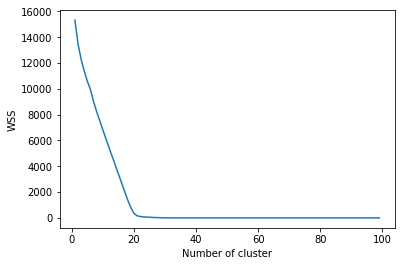

In [335]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

##### We can see clear elbow bend at 20, so taking optimum value of K as 20

In [25]:
X_train_std=pd.DataFrame(X_train_std)

In [26]:
kmeans = KMeans(n_clusters=20)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_

666


#### Checking for cluster stability

In [27]:
from sklearn.metrics import adjusted_rand_score

In [28]:
indices=X_train_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([239, 163, 300, 393, 230,  70,  61, 200, 582, 413,
            ...
            346, 354, 256, 340, 183, 574, 434, 334, 235, 311],
           dtype='int64', length=599)


In [29]:
Alpha=X_train_std.drop(['clus'],axis=1).iloc[indices,:]

In [30]:
Alpha.shape

(599, 23)

In [31]:
kmeans = KMeans(n_clusters=20)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

599


In [32]:
g1=X_train_std.loc[indices,'clus']
g2=Alpha.clus

In [33]:
adjusted_rand_score(g1,g2)

0.9612092895336984

#### Frequency of users assigned to each cluster 

In [34]:
X_train_std['clus'].value_counts()

1     477
2      81
0      31
7      12
8      10
6      10
19      9
9       8
4       7
12      5
10      2
18      2
13      2
15      2
3       2
16      2
11      1
14      1
5       1
17      1
Name: clus, dtype: int64

In [36]:
users_dp.shape,X_train_std.shape

((666, 5), (666, 24))

In [37]:
users_dp_kms = users_dp.join(X_train_std[['clus']])

In [38]:
users_dp_kms.head()

,login_hash,server_hash,country_hash,currency,enable,clus
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1,1.0
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1,1.0
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1,1.0
3,DEFB729116227EF8582BFEC65F998489,76791A893BDB9A68E8EE44898D581A60,103357E3E40A9C0E4E9D36110F7BBC7A,USD,1,16.0
4,9EAD9A73AA6C93823C56BB8C2E798B45,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1,1.0


In [39]:
users_clus = pd.DataFrame(users_dp_kms.groupby('clus')['login_hash'].count())
users_clus.columns = ['Frequency']

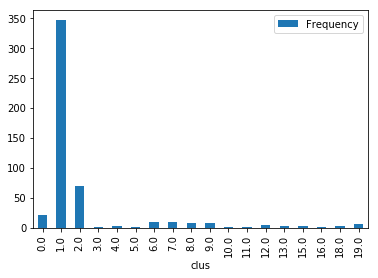

In [40]:
users_clus.plot(kind='bar')
plt.show()

In [ ]:
# ! pip install plotly

In [44]:
# from mpl_toolkits.mplot3d import Axes3D

In [45]:
##### The End ####